## Initial Setup

In [1]:
from pyspark.sql import SparkSession

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1709484245795_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
spark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
from pyspark.sql import functions as F

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 ## <font color='red'>Task 01: Read the data </font>

<font color='red'> Ensure you read the data so that all columns are read with the right data type.
The "right" datatype at this stage are shown in the expected output cell below. </font>

<font color='red'>
    
**Sample input:** 
This task does not have an input. 

**Sample output:** 
Dataframe stored in the variable ```raw_recipes_df```.  </font>

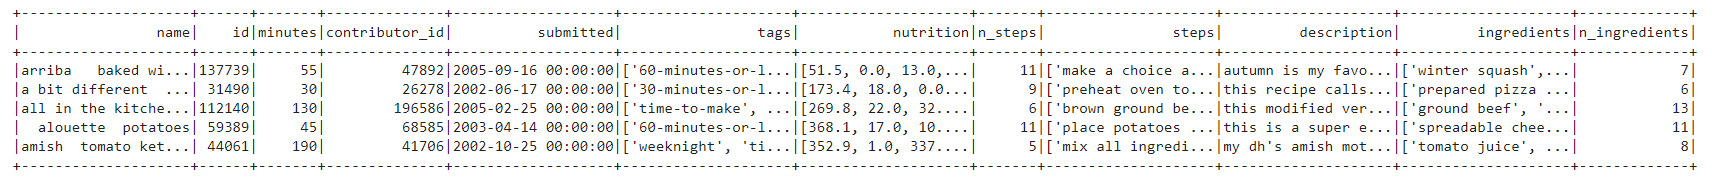

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 1 </font>

<font color='blue'>complete the code in the following cell </font>

In [5]:
# Task 01 Cell 1 out of 1

raw_recipes_df = (spark.read.csv("s3a://raw-recipes-clean-upgrad/RAW_recipes_cleaned.csv", 
                   header=True,       # argument 1, Add an argument to communicate to the compiler that there is a header in the raw data.
                   inferSchema=True   # argument 2, Add an argument to ask the complier to estimate the data types for all columns. 
                               ))

# Please forward the exact name of data frames and columns as suggested in the code. 
# It will ensure that the assert commands function correctly.  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
raw_recipes_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|                name|    id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|
+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16|['60-minutes-or-l...|[51.5, 0.0, 13.0,...|     11|['make a choice a...|autumn is my favo...|['winter squash',...|            7|
|a bit different  ...| 31490|     30|         26278|2002-06-17|['30-minutes-or-l...|[173.4, 18.0, 0.0...|      9|['preheat oven to...|this recipe calls...|['prepared pizza ...|            6|
|all in the kitche...|112140|    130|        

In [8]:
raw_recipes_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- name: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)

<font color='blue'>Test cases for Task 01</font>

In [9]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.count() == 231637, "There is a mistake in reading the data."
assert len(raw_recipes_df.columns) == 12, "There is a mistake in reading the data."
assert raw_recipes_df.schema["minutes"].dataType == IntegerType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["tags"].dataType == StringType(), "The data types have not been read correctly."
assert raw_recipes_df.schema["n_ingredients"].dataType == IntegerType(), "The data types have not been read correctly."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
raw_recipes_df.count() == 231637

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [11]:
len(raw_recipes_df.columns) == 12

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [12]:
raw_recipes_df.schema["minutes"].dataType == IntegerType()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [13]:
raw_recipes_df.schema["tags"].dataType == StringType()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [14]:
raw_recipes_df.schema["n_ingredients"].dataType == IntegerType()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

#### All the test cases have been passed. Task 01 completed.

## Extract ```nutrition``` values 

In [15]:
# List of nutrition columns

nutrition_column_names = ['calories',
                          'total_fat_PDV',
                          'sugar_PDV',
                          'sodium_PDV',
                          'protein_PDV',
                          'saturated_fat_PDV',
                          'carbohydrates_PDV']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

 ## <font color='red'>Task 02: Extract individual features from the nutrition column.

<font color='red'> 
As read by the spark compiler, the nutrition column is a string column when it should be an array of float values. Each row in the nutrition column contains seven values. Each value represents nutrition information. 
    
    
**Your task is to separate the array into seven individual columns.**
    
Write a code that takes in the nutrition column from ```raw_recipes_df``` dataframe, and extracts individual values into seven different columns named calories, total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), and carbohydrates (PDV).

</font>

<font color='red'>
    
### **Sample input:** 
    
The image below shows a subset of columns from the ```raw_recipes_df``` dataset. The datatype of the nutrition column is a string.
 </font>

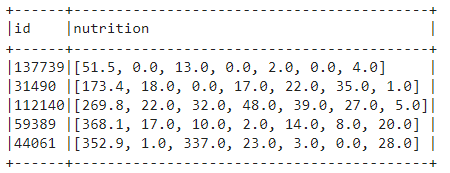

<font color='red'>
    
### **Sample Output:** 
    
The image below shows a subset of columns from the ```raw_recipes_df``` dataset after the extraction of nutrition values is completed. The datatype of the individual nutrition column is has to be float.
 </font>

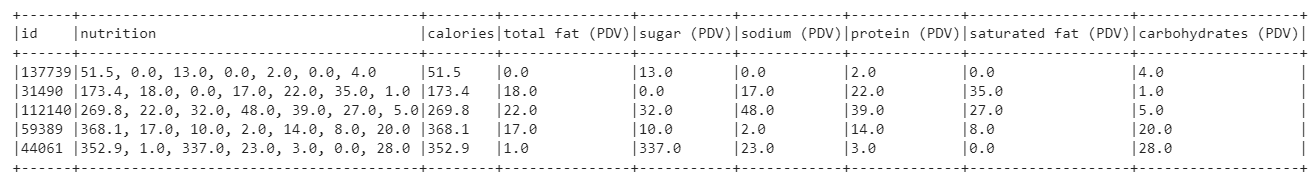

<font color='red'>

This task is further divided into two sub tasks 
    
### Task 2.1 
    
Use string operations to remove the square brackets from the nutrition column. 

Sample input: nutrition column 
    </font>

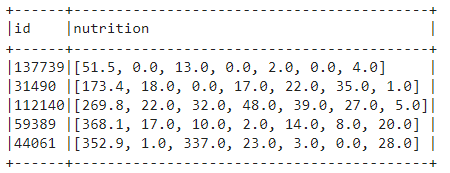

<font color='red'>


**Sample output:** 
Nutrition column without the brackets. 
    
</font>

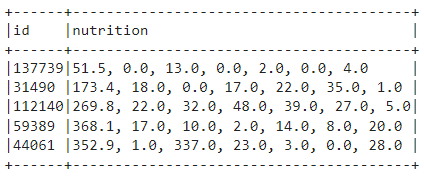

<font color='red'>

### Task 2.2 
    
Task 2.2 Split the nutrition column into seven individual columns and cast the new columns to float values. 

First split the column on using the comma delimiter. Then you can use a for loop to iterate over the column names declared in the variable ```nutrition_column_names```, inside each iteration write a code to extract the value at a specific index of the nutrition array  

**Sample input:**
Nutrition column without the brackets.
    
</font>

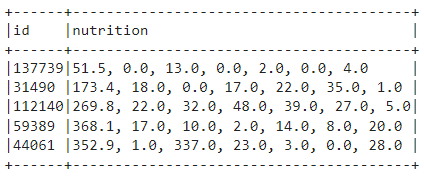

<font color='red'>

**Sample output:**
Nutrition column split into multiple 
    
</font>

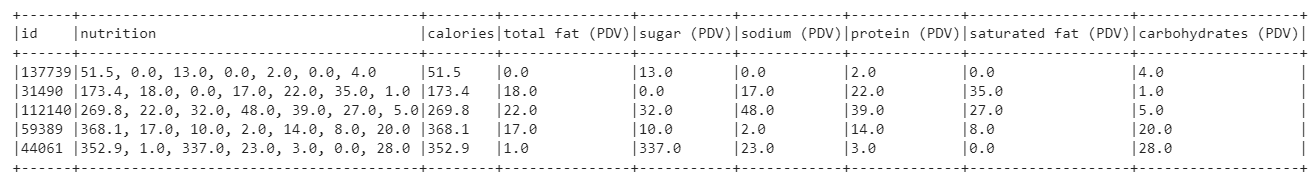

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 2 </font>

<font color='blue'>complete the code in the following cell </font>

In [16]:
# Task 02 Cell 1 out of 2
# 2.1 - string operations to remove square brakets

raw_recipes_df = raw_recipes_df.withColumn('nutrition', F.regexp_replace('nutrition', r'\[|\]', ''))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
raw_recipes_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|                name|    id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|
+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16|['60-minutes-or-l...|51.5, 0.0, 13.0, ...|     11|['make a choice a...|autumn is my favo...|['winter squash',...|            7|
|a bit different  ...| 31490|     30|         26278|2002-06-17|['30-minutes-or-l...|173.4, 18.0, 0.0,...|      9|['preheat oven to...|this recipe calls...|['prepared pizza ...|            6|
|all in the kitche...|112140|    130|        

In [18]:
# Task 02 Cell 2 out of 3
# STEP 2.2 - split the neutrition string into seven individial values. 
# Create an object to split the nutrition column

nutrition_cols_split = F.split(raw_recipes_df['nutrition'], ', ') # pyspark function to split values based on a delimiter.  

# Write a loop to extract individual values from the nutrition column

for col_index, col_name in enumerate(nutrition_column_names):
    # col_index holds the index number of each column, e.g., calories will be 0
    # col_name holds the name of each column 
    
    raw_recipes_df = (raw_recipes_df.withColumn(col_name,
                                                # pyspark function to extract individual values from the nutrition_cols_split object
                                                nutrition_cols_split.getItem(col_index).cast("float")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
raw_recipes_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+
|                name|    id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|calories|total_fat_PDV|sugar_PDV|sodium_PDV|protein_PDV|saturated_fat_PDV|carbohydrates_PDV|
+--------------------+------+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+
|arriba   baked wi...|137739|     55|         47892|2005-09-16|['60-minutes-or-l...|51.5, 0.0, 13.0, ...|     11|['make a choice a...|autumn is my favo

Hint: [Visit this page to learn more about splitting columns](https://sparkbyexamples.com/pyspark/pyspark-split-dataframe-column-into-multiple-columns/)

**Test cases for task 02**

In [20]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["carbohydrates_PDV"].dataType == FloatType(), "Recheck your typecasting"
assert raw_recipes_df.collect()[123432][14] == 62.0, "The columns have not been split correctly."
assert raw_recipes_df.collect()[10000][12] == 60.400001525878906, "The columns have not been split correctly."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
raw_recipes_df.schema["carbohydrates_PDV"].dataType == FloatType()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [22]:
raw_recipes_df.collect()[123432][14] == 62.0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [23]:
raw_recipes_df.collect()[10000][12] == 60.400001525878906

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

#### All the test cases have been passed. Task 02 completed.

## Make nutrition-per-100 calorie columns

By converting the nutrition values from absolute to relative terms, we ensure that portion size is not a factor in the analysis. 


Naming convention: Original column name ```total fat (PDV)```, column name after column ```total_fat_per_100_cal```

## <font color='red'>Task 03: Standardize the nutrition values </font>

<font color='red'>
The current values for nutrition columns are not on the same scale. 
Your task is to standardize the nutrition columns using calories as the base of standardization. 

Convert the nutrition from absolute values to per 100 calorie values. 
</font>

<font color='red'>
    
We will use the  ```sugar (PDV)``` column to demonstrate the calculations for standardization.  

</font>

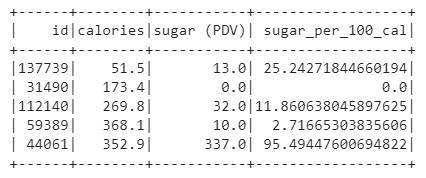

<font color='red'>
    
**Sample Calculation**

Before transformation: ```sugar (PDV)``` for recipe id 137739 = 13.0

Calories in the recipe recipe id 137739                       = 51.5

Calculation:  
sugar_per_100_cal = 13.0 * 100 / 51.5 

After transformation ```sugar_per_100_cal``` = 25.24
    
</font>

<font color='red'>

**Sample Input:** 

All nutrition columns except calories
    
</font>

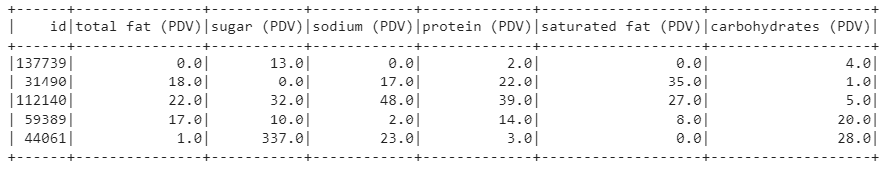

<font color='red'>

**Sample Output:** 

All nutrition columns standardized to per 100 calories 
    
</font>

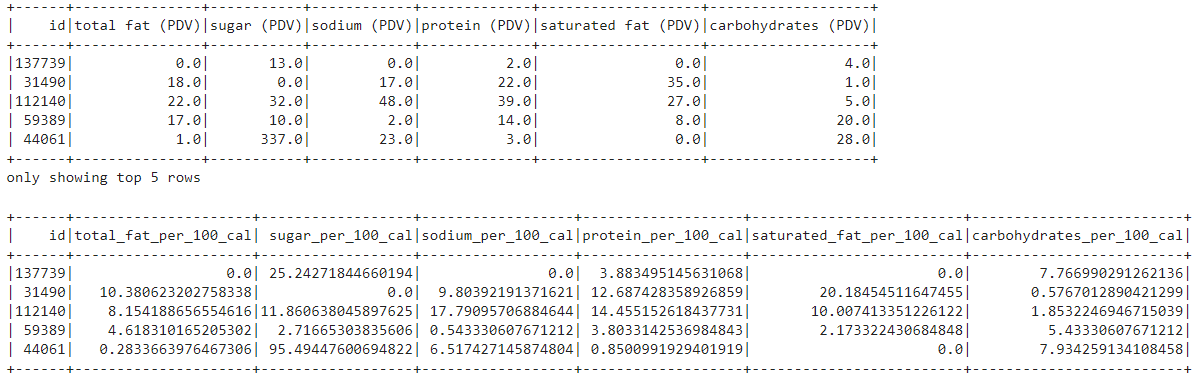

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 3 </font>

<font color='blue'>Complete the code in the following cell</font>

In [24]:
# Task 03 Cell 1 out of 1

for col_name in nutrition_column_names:
    if col_name != 'calories':
        
        nutrition_per_100_cal_col = (col_name
                                     .replace('_PDV', '')
                                     + '_per_100_cal')
        
        raw_recipes_df = raw_recipes_df.withColumn(nutrition_per_100_cal_col,
                                                   (raw_recipes_df[col_name] * 100 / raw_recipes_df["calories"]))                                                  
        
        # You might end up adding nulls to the data because of our intended transformation. 
        # Perform a fill na operation to fill all the nulls with 0s. 
        # You must limit the scope of the fill na to the current column only. 
        
        raw_recipes_df = raw_recipes_df.fillna(0, subset=[nutrition_per_100_cal_col]) # pyspark code to fill nulls with 0 in only the current nutrition_per_100_cal_col 
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 03**

In [25]:
# total fat check for id 28881
assert raw_recipes_df.filter("id == 28881").select('total_fat_per_100_cal').first()[0] == 0, "total_fat_per_100_cal for recipe 28881 should be 0"

# total fat check for id 112140
assert round(raw_recipes_df.filter("id == 112140").select('total_fat_per_100_cal').first()[0]) == 8, "total_fat_per_100_cal for recipe 112140 should be 8"

# checking for nulls
for c in ['total_fat_per_100_cal','sugar_per_100_cal','sodium_per_100_cal','protein_per_100_cal',
                          'saturated_fat_per_100_cal','carbohydrates_per_100_cal']:
    assert raw_recipes_df.select(F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c)).collect()[0][0] == 0, "There are Nulls in the data"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
raw_recipes_df.filter("id == 28881").select('total_fat_per_100_cal').first()[0] == 0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [27]:
round(raw_recipes_df.filter("id == 112140").select('total_fat_per_100_cal').first()[0]) == 8

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [28]:
for c in ['total_fat_per_100_cal','sugar_per_100_cal','sodium_per_100_cal','protein_per_100_cal',
                          'saturated_fat_per_100_cal','carbohydrates_per_100_cal']:
    assert raw_recipes_df.select(F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c)).collect()[0][0] == 0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
raw_recipes_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- name: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)
 |-- calories: float (nullable = true)
 |-- total_fat_PDV: float (nullable = true)
 |-- sugar_PDV: float (nullable = true)
 |-- sodium_PDV: float (nullable = true)
 |-- protein_PDV: float (nullable = true)
 |-- saturated_fat_PDV: float (nullable = true)
 |-- carbohydrates_PDV: float (nullable = true)
 |-- total_fat_per_100_cal: double (nullable = false)
 |-- sugar_per_100_cal: double (nullable = false)
 |-- sodium_per_100_cal: double (nullable = false)
 |-- protein_per_100_cal: double (nullable = false)
 

#### All the test cases have been passed. Task 03 completed.

## <font color='red'>Task 04: Convert the tags column from a string to an array of strings </font>

<font color='red'>
    
Currently, the tags column is a string column but holds an array of strings. 

Your task is to convert the tags columns from a string to an array of strings. 
    
</font>

<font color='red'>

Remove ```[``` ```]``` ```'``` punctuation marks from the tags column. 
Split the tags column based on the comma delimiter. 
    

</font>

<font color='red'>

**Sample input**
    
Tags column in string datatype. 
    
</font>

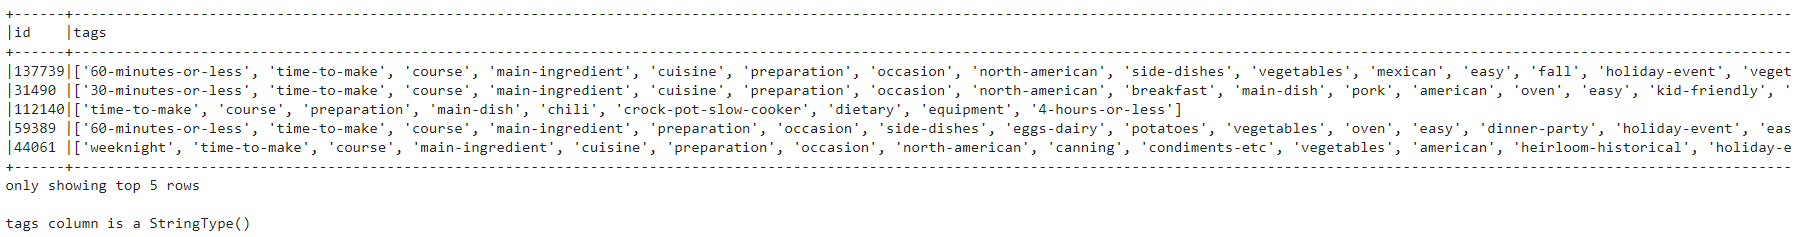

<font color='red'>

**Sample outout**
    
Tags column in array of ArrayType(StringType())  
    
</font>

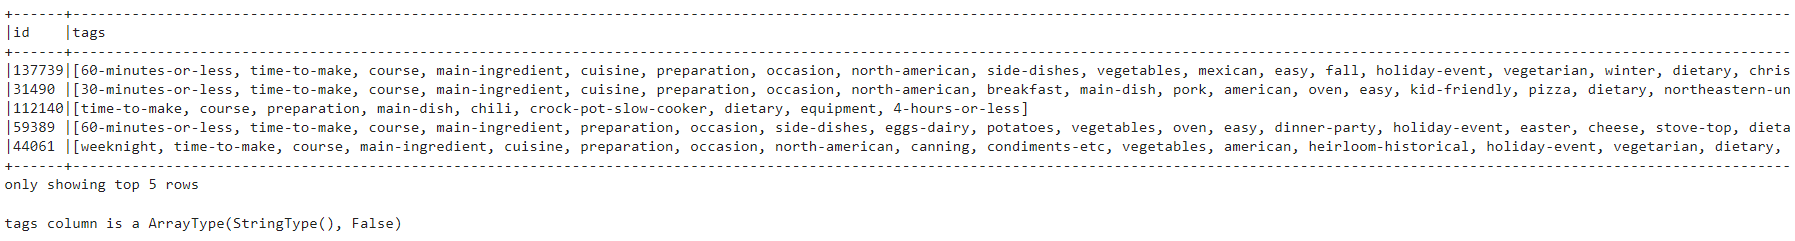

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 4 </font>

<font color='blue'>Complete the code in the following cell</font>

In [30]:
# Task 04 Cell 1 out of 1

raw_recipes_df = (raw_recipes_df
                  .withColumn('tags', F.regexp_replace("tags","[\\[\\]\\']","")
                             )
                  .withColumn('tags', F.split("tags",", ")
                             )
                 )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
raw_recipes_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- name: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: string (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)
 |-- calories: float (nullable = true)
 |-- total_fat_PDV: float (nullable = true)
 |-- sugar_PDV: float (nullable = true)
 |-- sodium_PDV: float (nullable = true)
 |-- protein_PDV: float (nullable = true)
 |-- saturated_fat_PDV: float (nullable = true)
 |-- carbohydrates_PDV: float (nullable = true)
 |-- total_fat_per_100_cal: double (nullable = false)
 |-- sugar_per_100_cal: double (nullable = false)
 |-- sodium_per_100_cal: double (nullable = false)
 |-- p

**Test cases for Task 04**

In [32]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_recipes_df.schema["tags"].dataType == ArrayType(StringType(), True), "You have not split the string into an array."
assert raw_recipes_df.collect()[2][5] == ['time-to-make','course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'], "Recheck your string cleaning and splitting operations."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
raw_recipes_df.schema["tags"].dataType == ArrayType(StringType(), True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [34]:
raw_recipes_df.collect()[2][5] == ['time-to-make','course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

#### All the test cases have been passed. Task 04 completed.

## Join Recipe Data to Review Data

In [35]:
# Reading the second data set. 
# keep this cell unedited

raw_ratings_df = (spark.read.csv("s3a://raw-interactions-upgrad/RAW_interactions_cleaned.csv", 
                                 header=True, 
                                 inferSchema= True)
                  .withColumn("review_date",  F.col("date"))
                  .drop(F.col("date"))
                  )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
raw_ratings_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- recipe_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review: string (nullable = true)
 |-- review_date: string (nullable = true)

In [38]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert raw_ratings_df.count() == 1132367, "There is a mistake in reading the data."
assert len(raw_ratings_df.columns) == 5, "There is a mistake in reading the data."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
raw_ratings_df.count() == 1132367

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [40]:
len(raw_ratings_df.columns) == 5

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [41]:
raw_ratings_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+--------------------+-----------+
|user_id|recipe_id|rating|              review|review_date|
+-------+---------+------+--------------------+-----------+
|  38094|    40893|     4|Great with a sala...| 2003-02-17|
|1293707|    40893|     5|So simple  so del...| 2011-12-21|
|   8937|    44394|     4|This worked very ...| 2002-12-01|
| 126440|    85009|     5|I made the Mexica...| 2010-02-27|
|  57222|    85009|     5|Made the cheddar ...| 2011-10-01|
+-------+---------+------+--------------------+-----------+
only showing top 5 rows

## <font color='red'>Task 05: Read the second data file </font>

<font color='red'>

Along with raw recipes data, we also have raw ratings data. 

The code to read the data is already written above. Your task is to join the raw ratings and raw recipes data. 

The resulting dataframe must have the same number of rows as in the raw ratings data. 
    
Join both the dataframes using the recipie IDs.
    
</font>

<font color='red'>
    
**Sample Input**
    
```raw recipes_df``` and ```raw_ratings_df```

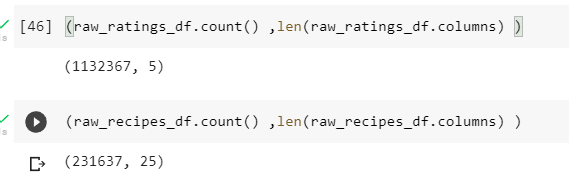

<font color='red'>

**Sample Output**

Combined dataframe with 30 columns and 1132367 rows 
    
</font>

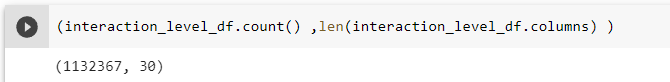

<font color='red'>

**Calculation explanation** 

There are 25 columns in the ```raw_recipes_df``` and five in the ```raw_ratings_df```. So total columns in the combined dataframe 25 + 5 = 30

The number of rows in the combined dataframe must be the same as the rows in the ```raw_ratings_df```. So total rows in combined dataframe 1132367
    
</font>

<font color='red'> We have included some test cases given below. You can use them to check if you have completed the task correctly.  </font>

### <font color='blue'>Solution to Task 5 </font>

<font color='blue'>Complete the code in the following cell</font>

In [42]:
# Task 05 Cell 1 out of 1

interaction_level_df = raw_ratings_df.join(raw_recipes_df,  
                                           raw_ratings_df.recipe_id == raw_recipes_df.id,
                                           "inner"
                                           )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 05**

In [43]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert (interaction_level_df.count() ,len(interaction_level_df.columns)) == (1132367, 30), "The type of join is incorrect"

list1 = raw_ratings_df.select('recipe_id').collect()
list2 = raw_recipes_df.select('id').collect()
exclusive_set = set(list1)-set(list2)

assert len(exclusive_set) == 0, "There is a mistake in reading one of the two data files."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
(interaction_level_df.count() ,len(interaction_level_df.columns)) == (1132367, 30)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [45]:
len(exclusive_set) == 0

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

#### All the test cases have been passed. Task 05 completed.

## <font color='red'>Task 06:  Create time-based features</font>


<font color='red'>

Currently, both the date columns, the submitted date, and the review date are in string forms. 
    
First convert the ```submitted``` and ```review_date``` to DateType()

Use review date and submission date to derive new features:
1. ```days_since_submission_on_review_date``` Number of days between the recipe submission and the current review.  
2. ```months_since_submission_on_review_date``` Number of months between the recipe submission and the current review. 
3. ```years_since_submission_on_review_date```Number of years between the recipe submission and the current review. 

</font>

<font color='red'>

**Sample input**

The following columns need to be used to calculate the time based features. 
    
</font>

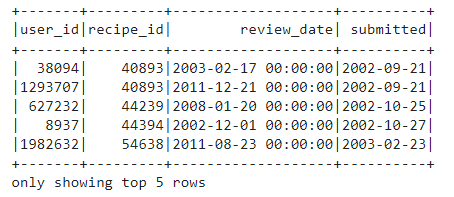

<font color='red'>

**Sample Output:**

New date based features have been added to the interactions dataframe

</font>

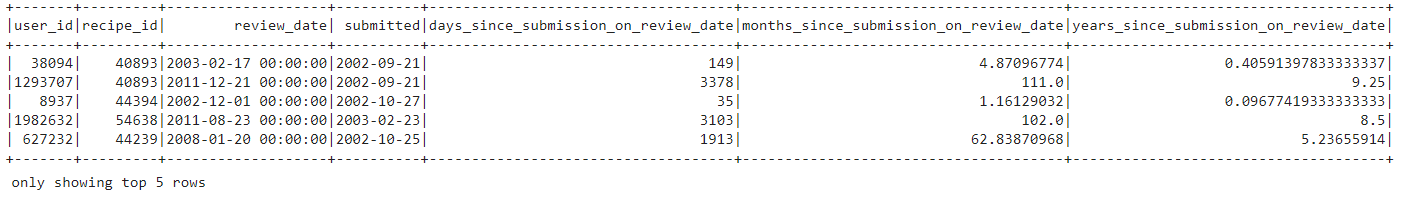

<font color='red'>

**Sample Calculation**

Recipe 40893 was submitted on 2002-09-21
User 38094 reviewed recipe 40893 on 2003-02-17

```days_since_submission_on_review_date``` number of calender days between 2002-09-21 and 2003-02-17 that is 149

```months_since_submission_on_review_date``` number of calender months between 2002-09-21 and 2003-02-17 that is 4.87 (calculated by a pyspark function)

```years_since_submission_on_review_date``` number of calender months divided by 12 that is 0.40
    
</font>

### <font color='blue'>Solution to Task 6 </font>

<font color='blue'>Complete the code in the following cell</font>

In [46]:
# Task 06 Cell 1 out of 2

interaction_level_df = (interaction_level_df
                        .withColumn('submitted', F.col("submitted").cast("date") 
                                   )
                        .withColumn('review_date', F.col("review_date").cast("date")
                                   )
                       )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
interaction_level_df = (interaction_level_df
                        .withColumn('days_since_submission_on_review_date',
                                     F.datediff("review_date","submitted")              
                                   )
                        .withColumn('months_since_submission_on_review_date',
                                     F.months_between("review_date","submitted")          
                                   )
                        .withColumn('years_since_submission_on_review_date',
                                     F.months_between("review_date","submitted")/12            
                                   )
                         )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Test cases for Task 06**

In [48]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.schema["days_since_submission_on_review_date"].dataType == IntegerType()

assert (interaction_level_df.filter((interaction_level_df.user_id == 428885) & (interaction_level_df.recipe_id == 335241))
                            .select('days_since_submission_on_review_date').collect()[0][0]) == 77
assert (interaction_level_df.filter((interaction_level_df.user_id == 2025676) & (interaction_level_df.recipe_id == 94265))
                            .select('months_since_submission_on_review_date').collect()[0][0]) == 153.22580645
assert (interaction_level_df.filter((interaction_level_df.user_id == 338588) & (interaction_level_df.recipe_id == 21859))
                            .select('years_since_submission_on_review_date').collect()[0][0]) == 4.564516129166667

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
interaction_level_df.schema["days_since_submission_on_review_date"].dataType == IntegerType()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [50]:
(interaction_level_df.filter((interaction_level_df.user_id == 428885) & (interaction_level_df.recipe_id == 335241))
                            .select('days_since_submission_on_review_date').collect()[0][0]) == 77

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [51]:
(interaction_level_df.filter((interaction_level_df.user_id == 2025676) & (interaction_level_df.recipe_id == 94265))
                            .select('months_since_submission_on_review_date').collect()[0][0]) == 153.22580645

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [52]:
(interaction_level_df.filter((interaction_level_df.user_id == 338588) & (interaction_level_df.recipe_id == 21859))
                            .select('years_since_submission_on_review_date').collect()[0][0]) == 4.564516129166667

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

#### All the test cases have been passed. Task 06 completed.

## Save the data we have created so far in a parquet file. 

In [53]:
interaction_level_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- recipe_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- name: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: date (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)
 |-- calories: float (nullable = true)
 |-- total_fat_PDV: float (nullable = true)
 |-- sugar_PDV: float (nullable = true)
 |-- sodium_PDV: float (nullable = true)
 |-- protein_PDV: float (nullable = true)
 |-- saturated_fat_PDV: float (nullable = true)
 |-- carboh

In [54]:
assert (interaction_level_df.count() ,len(interaction_level_df.columns) ) == (1132367, 33)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
(interaction_level_df.count() ,len(interaction_level_df.columns) ) == (1132367, 33)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

True

In [56]:
## Write the raw_recipes_df
## create a folder named data in you current directry before running this. 

interaction_level_df.write
                    .mode('overwrite')
                    .parquet('s3a://upgradfoodrecsysdir/interaction_level_df_processed.parquet') # Modify the path as you need

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
interaction_level_df.show(6)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+--------------------+-----------+--------------------+---+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+---------------------+-------------------+------------------+-------------------+-------------------------+-------------------------+------------------------------------+--------------------------------------+-------------------------------------+
|user_id|recipe_id|rating|              review|review_date|                name| id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|calories|total_fat_PDV|sugar_PDV|sodium_PDV|protein_PDV|saturated_fat_PDV|carbohydrates_PDV|total_fat_per_100_cal|  sugar_per_100_cal|sodium_per_100_cal|protein_per_100_c

## Initial Setup

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

In [ ]:
spark

In [ ]:
# Run this everytime you create a new spark instance. 

spark.sparkContext.install_pypi_package("plotly==5.5.0")
spark.sparkContext.install_pypi_package("pandas==0.25.1")
spark.sparkContext.install_pypi_package("numpy==1.14.5")
spark.sparkContext.install_pypi_package("matplotlib==3.1.1")

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

## Defining Custom Functions 

In [6]:
def get_quantiles(df, col_name, quantiles_list = [0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Takes a numerical column and returns column values at requested quantiles

    Inputs 
    Argument 1: Dataframe
    Argument 2: Name of the column
    Argument 3: A list of quantiles you want to find. Default value [0.01, 0.25, 0.5, 0.75, 0.99]

    Output 
    Returns a dictionary with quantiles as keys and column quantile values as values 
    """
    # Get min, max and quantile values for given column
    min_val = df.agg(F.min(col_name)).first()[0]
    max_val = df.agg(F.max(col_name)).first()[0]
    quantiles_vals = df.approxQuantile(col_name,
                                       quantiles_list,
                                       0)
  
    # Store min, quantiles and max in output dict, sequentially
    quantiles_dict = {0.0:min_val}
    quantiles_dict.update(dict(zip(quantiles_list, quantiles_vals)))
    quantiles_dict.update({1.0:max_val})
    return(quantiles_dict)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:

def plot_bucketwise_statistics (summary, bucketizer):
    """
    Takes in a dataframe and a bucketizer object and plots the summary statistics for each bucket in the dataframe. 
  
    Inputs
    Argument 1: Pandas dataframe obtained from bucket_col_print_summary function 
    Argument 2: Bucketizer object obtained from bucket_col_print_summary function
  
    Output
    Displays a plot of bucketwise average ratings nunber of ratings of a parameter.   
    """
    # Creating bucket labels from splits
    classlist = bucketizer.getSplits()
    number_of_classes = len(classlist) - 1

    class_labels = []
    hover_labels = []
    for i in range (number_of_classes):
        hover_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) +" (Bucket name: "+ str(int(i)) +")"  )
        class_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) )
  
    summary["Scaled_number"] = (summary["n_ratings"]-summary["n_ratings"].min())/(summary["n_ratings"].max()-summary["n_ratings"].min()) + 1.5
    summary['Bucket_Names'] = class_labels
  
    # making plot
    x = summary["Bucket_Names"]
    y1 = summary["avg_rating"]
    y2 = summary["n_ratings"]
    err = summary["stddev_rating"]  

    # Plot scatter here
    plt.rcParams["figure.figsize"] = [summary.shape[0]+2, 6.0]
    plt.rcParams["figure.autolayout"] = True
    fig, ax1 = plt.subplots()

    bar = ax1.bar(x, y1, color = "#262261")
    ax1.errorbar(x, y1, yerr=err, fmt="o", color="#EE4036")
    ax1.set(ylim=(0, 7))
  
    #ax1.bar_label(bar , fmt='%.2f', label_type='edge')  
    def barlabel(x_list,y_list):
        for i in range(len(x_list)):
            ax1.text(i,y_list[i] + 0.2,y_list[i], ha = 'center',
  			         fontdict=dict(size=10),
  			         bbox=dict(facecolor='#262261', alpha=0.2)         
  			        )
    barlabel(summary["Bucket_Names"].tolist() ,summary["avg_rating"].round(2).tolist())
  
    ax2 = ax1.twinx()
    ax2.scatter(x, y2, s=summary["Scaled_number"]*500, c = '#FAAF40')  
    ax2.set(ylim=(0, summary["n_ratings"].max()*1.15))
    def scatterlabel(x_list,y_list):
  	    for i in range(len(x_list)):
  		    ax2.text(i,y_list[i] + 15000,y_list[i], ha = 'center',
  					 fontdict=dict(size=10),
                     bbox=dict(facecolor='#FAAF40', alpha=0.5)
  					)
    scatterlabel(summary["Bucket_Names"].tolist() ,summary["n_ratings"].tolist())
  
    # giving labels to the axises
    ax1.set_xlabel(bucketizer.getOutputCol(), fontdict=dict(size=14)) 
    ax1.set_ylabel("Average Ratings",fontdict=dict(size=14))
  
    # secondary y-axis label
    ax2.set_ylabel('Number of Ratings',fontdict=dict(size=14))
  
    #plot Title
    plt.title('Bucketwise average ratings and number of ratings for \n'+bucketizer.getInputCol(), 
              fontdict=dict(size=14))  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
def bucket_col_print_summary(df, splits, inputCol, outputCol):
    """
    Given a numerical column in a data frame, adds a bucketized version of the column to the data frame, according to splits provided.
    Also prints a summary of ratings seen in each bucket made.

    Inputs 
    Argument 1: Data Frame 
    Argument 2: Values at which the column will be split
    Argument 3: Name of the input column (numerical column)
    Argument 4: Name of the output column (bucketized numerical column)

    Output: 
    1) New dataframe with the output column added
    2) Bucketizer object trained from the input column 
    3) Pandas dataframe with summary statistics for ratings seen in buckets of the output column
    Also plots summary statistics for ratings seen in buckets of the output column
    """

    # Dropping bucket if it already exists
    if outputCol in df.columns:
        df = df.drop(outputCol)

    # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                            inputCol  = inputCol,
                            outputCol = outputCol)
    
    df = bucketizer.setHandleInvalid("keep").transform(df)

    # Printing meta information on buckets created
    print("Added bucketized column {}".format(outputCol))
    print("")
    print("Bucketing done for split definition: {}".format(splits))
    print("")  
    print("Printing summary statistics for ratings in buckets below:")

    # Creating a summary statistics dataframe and passing it to the plotting function
    summary =  (df
                .groupBy(outputCol)
                .agg(F.avg('rating').alias('avg_rating'),
                     F.stddev('rating').alias('stddev_rating'),
                     F.count('rating').alias('n_ratings'))
                .sort(outputCol)
                .toPandas())
  
    plot_bucketwise_statistics(summary,bucketizer)
  
    return df, bucketizer, summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
def get_column_distribution_summary(df, col_name):
    """
    Takes a column in a data frame and prints the summary statistics (average, standard deviation, count and distinct count) for all unique values in that column.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Name of the column
  
    Output
    Returns nothing 
    Prints a Dataframe with summary statistics
    """
    print(df
          .groupBy(col_name)
          .agg(F.avg('rating').alias('avg_rating'),
               F.stddev('rating').alias('stddev_rating'),
               F.count('rating').alias('n_ratings'),
               F.countDistinct('id').alias('n_recipes'))
          .sort(F.col(col_name).asc())
          .show(50))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
def get_n_items_satisfying_condition (df, condition, aggregation_level = "recipe"):
    """
    Given a condition, find the number of recipes / reviews that match the condition.
    Also calculates the percentage of such recipes / reviews as a percentage of all recipes / reviews.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Logical expression describing a condition, string type. eg: "minutes == 0"
    Argument 3: Aggregation level for determining "items", either  "recipe" or "review". Default value == "recipe"
  
    Output: Returns no object.
    Prints the following:
    1) Number of recipes / reviews that satisfy the condition
    2) Total number of recipes / reviews in the dataframe
    3) Percentage of recipes / reviews that satisfy the condition
    """
    # Find out num rows satisfying the condition
    if aggregation_level == "recipe": 
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id"))).first()[0]
      
        n_rows_total = (df.agg(F.countDistinct("id"))).first()[0]
    if aggregation_level == "review":
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id","user_id"))).first()[0]
        n_rows_total = (df.agg(F.countDistinct("id","user_id"))).first()[0]
  
    # Find out % rows satisfying the conditon and print a properly formatted output
    perc_rows = round(number_of_rows_satisfying_condition * 100/ n_rows_total, 2)
    print('Condition String                   : "{}"'.format(condition))
    print("Num {}s Satisfying Condition   : {} [{}%]".format(aggregation_level.title(), number_of_rows_satisfying_condition, perc_rows))
    print("Total Num {}s                  : {}".format(aggregation_level.title(), n_rows_total))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Read the data

- Read ```interaction_level_df_processed```

In [11]:
interaction_level_df = spark.read.parquet("s3a://upgradfoodrecsysdir/interaction_level_df_processed.parquet", header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code.  

assert interaction_level_df.count() == 1132367, "There is a mistake in reading the data."
assert len(interaction_level_df.columns) == 33, "There is a mistake in reading the data."

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
interaction_level_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+--------------------+-----------+--------------------+---+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+---------------------+------------------+------------------+-------------------+-------------------------+-------------------------+------------------------------------+--------------------------------------+-------------------------------------+
|user_id|recipe_id|rating|              review|review_date|                name| id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|calories|total_fat_PDV|sugar_PDV|sodium_PDV|protein_PDV|saturated_fat_PDV|carbohydrates_PDV|total_fat_per_100_cal| sugar_per_100_cal|sodium_per_100_cal|protein_per_100_cal

## Bucketing and Cleaning Numerical Features

#### **1. `years_since_submission_on_review_date`** 
[Review Time Since Submission]
- Recipes more than 6 years old are rated low

In [14]:
get_quantiles(df = interaction_level_df,
              col_name = "years_since_submission_on_review_date")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: -4.833333333333333, 0.01: 0.005376344166666667, 0.25: 0.8602150541666668, 0.5: 2.9489247308333333, 0.75: 5.844086021666667, 0.99: 14.626344085833333, 1.0: 19.284946236666666}

In [15]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition= 'years_since_submission_on_review_date < 0',
                                 aggregation_level= "review")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Condition String                   : "years_since_submission_on_review_date < 0"
Num Reviews Satisfying Condition   : 1246 [0.11%]
Total Num Reviews                  : 1132367

In [16]:
# Only keep interactions with review dates >= recipe submission date

interaction_level_df = (interaction_level_df
                        .filter('years_since_submission_on_review_date >= 0'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
splits = [ 0, 1, 3, 6, float('Inf')]
inputCol  = "years_since_submission_on_review_date"
outputCol = "years_since_submission_on_review_date_bucket"

(interaction_level_df, submission_time_bucketizer, submission_time_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Added bucketized column years_since_submission_on_review_date_bucket

Bucketing done for split definition: [0, 1, 3, 6, inf]

Printing summary statistics for ratings in buckets below:

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

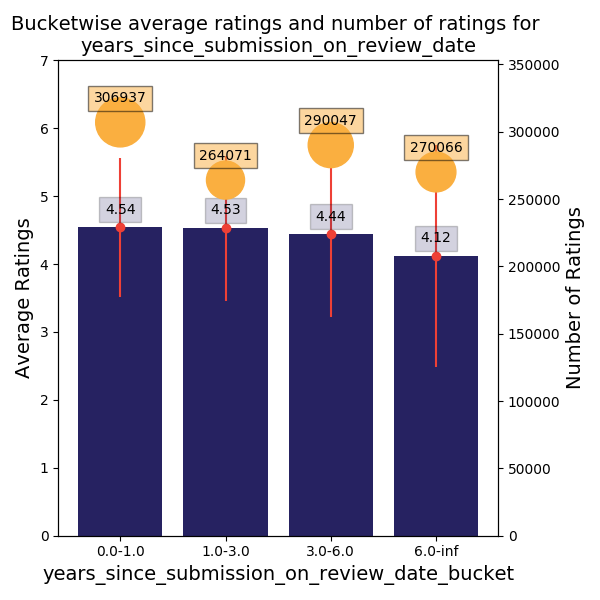

In [28]:
%matplot plt

#### **2. `minutes`** 

[prep time]
- Somewhat relevant
- Low prep time is preferred

In [29]:
get_quantiles(df = interaction_level_df,
              col_name = "minutes",
              quantiles_list=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 0, 0.01: 2.0, 0.05: 5.0, 0.25: 20.0, 0.5: 40.0, 0.75: 70.0, 0.95: 310.0, 0.99: 930.0, 1.0: 2147483647}

In [30]:
# Capping prep time at 930 minutes

interaction_level_df = (interaction_level_df
                        .withColumn("minutes",
                                    F.when(interaction_level_df["minutes"] > 930, 930)
                                     .otherwise(interaction_level_df["minutes"])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# investigating recipes with minutes = 0 -> Look at n_steps for such recipes.

get_column_distribution_summary(df = (interaction_level_df
                                      .filter('minutes == 0')
                                      .withColumn('n_steps_modified', (F.when(interaction_level_df['n_steps'] >= 10, ">= 10")
                                                                        .otherwise(F.lpad(interaction_level_df['n_steps'],2,"0"))))),
                                col_name = 'n_steps_modified')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------+------------------+---------+---------+
|n_steps_modified|        avg_rating|     stddev_rating|n_ratings|n_recipes|
+----------------+------------------+------------------+---------+---------+
|              01|              4.24|1.0908712114635712|       25|       12|
|              02|4.4423076923076925|  1.08678668673504|      104|       28|
|              03| 3.989130434782609|1.5750414356065066|      184|       44|
|              04|  4.30635838150289| 1.386737441364113|      173|       57|
|              05| 4.231788079470198| 1.356386192466306|      302|       90|
|              06|       4.470703125|1.1463893346523666|      512|      102|
|              07|4.3447432762836184|1.2875641979464008|      409|       92|
|              08| 4.381995133819951| 1.277408546667124|      411|       92|
|              09| 4.076190476190476|1.5270088873176948|      315|       86|
|           >= 10| 4.240963855421687|1.3768155493871752|     2075|      491|

In [32]:
# let's look at some examples with 1 step only to see if this makes sense

interaction_level_df.filter('minutes == 0 and n_steps == 1').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+--------------------+-----------+--------------------+----+-------+--------------+----------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+-------------+--------+-------------+---------+----------+-----------+-----------------+-----------------+---------------------+------------------+------------------+-------------------+-------------------------+-------------------------+------------------------------------+--------------------------------------+-------------------------------------+--------------------------------------------+
|user_id|recipe_id|rating|              review|review_date|                name|  id|minutes|contributor_id| submitted|                tags|           nutrition|n_steps|               steps|         description|         ingredients|n_ingredients|calories|total_fat_PDV|sugar_PDV|sodium_PDV|protein_PDV|saturated_fat_PDV|carbohydrates_PDV|total_fat_per_100_cal| sugar_per

In [33]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'minutes == 0',
                                 aggregation_level = "recipe")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Condition String                   : "minutes == 0"
Num Recipes Satisfying Condition   : 1094 [0.47%]
Total Num Recipes                  : 231501

In [34]:
# Remove recipes with cook time zero

interaction_level_df = interaction_level_df.filter("minutes > 0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
splits = [0, 5, 15, 30, 60, 300, 900, float('Inf')]
inputCol  = "minutes"
outputCol = "prep_time_bucket"

(interaction_level_df, prep_time_bucketizer, prep_time_summary_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Added bucketized column prep_time_bucket

Bucketing done for split definition: [0, 5, 15, 30, 60, 300, 900, inf]

Printing summary statistics for ratings in buckets below:

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

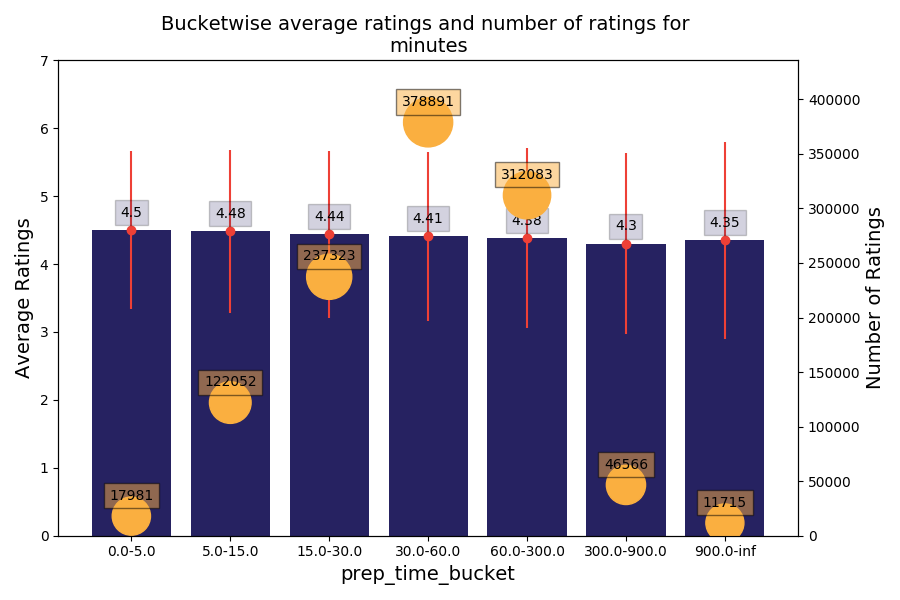

In [36]:
%matplot plt

**3. `n_steps`**

- Clearly relevant
- Recipes with less than 2 steps are rated high
- Recipes with more than 29 steps are rated very low

In [37]:
get_quantiles(df = interaction_level_df,
              col_name = "n_steps")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 0, 0.01: 2.0, 0.25: 6.0, 0.5: 8.0, 0.75: 12.0, 0.99: 29.0, 1.0: 145}

In [38]:
interaction_level_df.filter('n_steps == 0').show(5, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+----------------+------+-------+--------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
get_n_items_satisfying_condition(df = interaction_level_df,
                                 condition = 'n_steps == 0',
                                 aggregation_level = "recipe")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Condition String                   : "n_steps == 0"
Num Recipes Satisfying Condition   : 1 [0.0%]
Total Num Recipes                  : 230407

In [40]:
# Remove recipes with n_steps zero

interaction_level_df = interaction_level_df.filter("n_steps > 0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
splits = [0, 2, 6, 8, 12, 29, float('Inf')]
inputCol  = "n_steps"
outputCol = "n_steps_bucket"

(interaction_level_df, n_steps_bucketizer, n_steps_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Added bucketized column n_steps_bucket

Bucketing done for split definition: [0, 2, 6, 8, 12, 29, inf]

Printing summary statistics for ratings in buckets below:

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

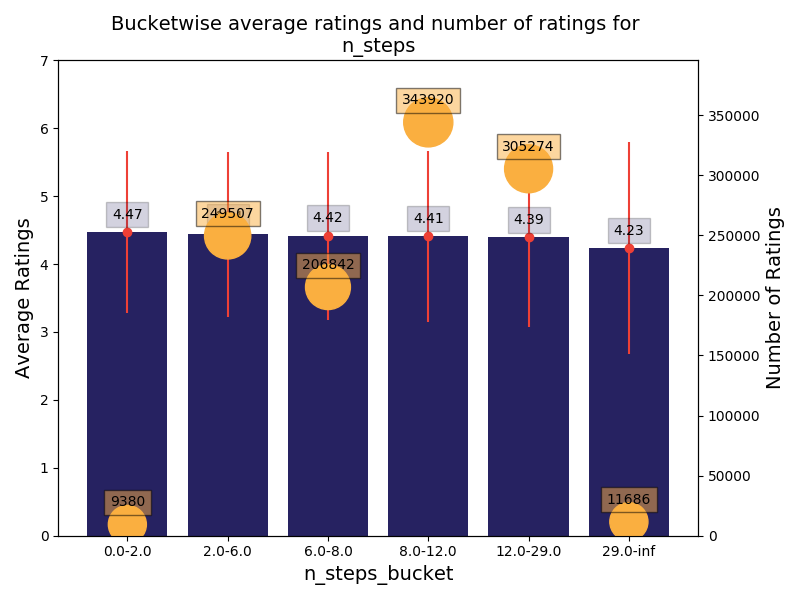

In [42]:
%matplot plt

**4. `n_ingredients`**
- Not relevant

In [43]:
get_quantiles(df = interaction_level_df,
              col_name = "n_ingredients")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 1, 0.01: 2.0, 0.25: 6.0, 0.5: 9.0, 0.75: 11.0, 0.99: 20.0, 1.0: 43}

In [44]:
splits = [0, 6, 9, 11, float('Inf')]
inputCol  = "n_ingredients"
outputCol = "n_ingredients_bucket"

(interaction_level_df, n_ingredients_bucketizer, n_ingredients_pandas_df) = bucket_col_print_summary(df = interaction_level_df,
                                                                              splits = splits,
                                                                              inputCol  = inputCol,
                                                                              outputCol = outputCol)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Added bucketized column n_ingredients_bucket

Bucketing done for split definition: [0, 6, 9, 11, inf]

Printing summary statistics for ratings in buckets below:

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

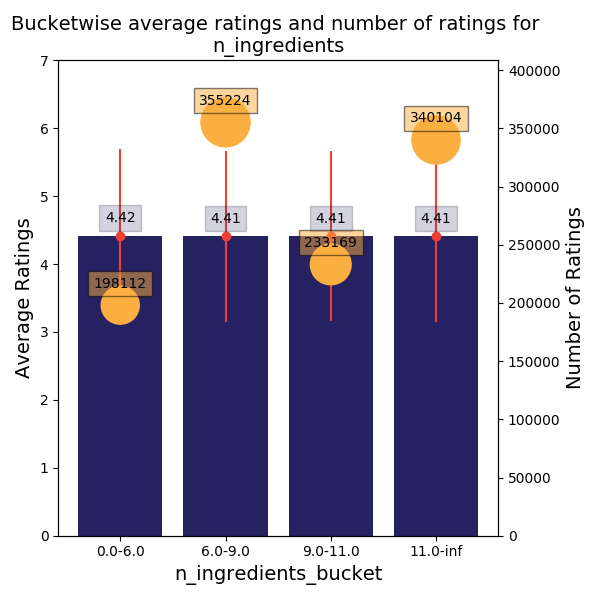

In [45]:
%matplot plt

**5. `nutrition` columns**

- `calories` - Calories per serving seems irrelevant
- `fat (per 100 cal)` - Calories per serving seems irrelevant
- `sugar (per 100 cal)` - Calories per serving seems irrelevant
- `sodium (per 100 cal)` - Calories per serving seems irrelevant
- `protein (per 100 cal)` - Calories per serving seems irrelevant
- `sat. fat (per 100 cal)` - Calories per serving seems irrelevant
- `carbs (per 100 cal)` - Calories per serving seems irrelevant

In [46]:
interaction_level_df.columns 


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['user_id', 'recipe_id', 'rating', 'review', 'review_date', 'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat_PDV', 'sugar_PDV', 'sodium_PDV', 'protein_PDV', 'saturated_fat_PDV', 'carbohydrates_PDV', 'total_fat_per_100_cal', 'sugar_per_100_cal', 'sodium_per_100_cal', 'protein_per_100_cal', 'saturated_fat_per_100_cal', 'carbohydrates_per_100_cal', 'days_since_submission_on_review_date', 'months_since_submission_on_review_date', 'years_since_submission_on_review_date', 'years_since_submission_on_review_date_bucket', 'prep_time_bucket', 'n_steps_bucket', 'n_ingredients_bucket']

In [47]:
nutrition_cols = ['calories', 
                  'total_fat_PDV', 
                  'sugar_PDV', 
                  'sodium_PDV', 
                  'protein_PDV', 
                  'saturated_fat_PDV', 
                  'carbohydrates_PDV', 
                  'total_fat_per_100_cal', 
                  'sugar_per_100_cal', 
                  'sodium_per_100_cal', 
                  'protein_per_100_cal', 
                  'saturated_fat_per_100_cal', 
                  'carbohydrates_per_100_cal']

quantiles_list = [0.00, 0.05, 0.25, 0.5, 0.75, 0.95, 1.00]
nutrition_col_quantiles = pd.DataFrame(index = quantiles_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
for col in nutrition_cols:
    nutrition_col_quantiles[col] = (get_quantiles(df = interaction_level_df,
                                                col_name = col,
                                                quantiles_list=quantiles_list)
                                  .values())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
nutrition_col_quantile_summary = pd.DataFrame(index = ["0.00-0.25", "0.25-0.50", "0.50-0.75", "0.75-0.95", "0.95 - 1.00"])

for col in nutrition_cols:
    splits = ([0]
            + list(nutrition_col_quantiles.loc[[0.25, 0.5, 0.75, 0.95], col].round())
            + [float('Inf')])
    inputCol  = col
    outputCol = col+"_bucket"

    if outputCol in interaction_level_df.columns:
        interaction_level_df = interaction_level_df.drop(outputCol)

  # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                          inputCol  = inputCol,
                          outputCol = outputCol)
  
    interaction_level_df = bucketizer.setHandleInvalid("keep").transform(interaction_level_df)
  
    nutrition_col_quantile_summary.loc[:, col] = (interaction_level_df
                                                .groupBy(outputCol)
                                                .agg(F.avg('rating').alias('avg_rating'))
                                                .sort(outputCol)
                                                .select('avg_rating').toPandas().values)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
# set the max columns to none
pd.set_option('display.max_columns', None)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
nutrition_col_quantile_summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

             calories  total_fat_PDV  sugar_PDV  sodium_PDV  protein_PDV  \
0.00-0.25    4.416167       4.393560   4.416368    4.423843     4.422679   
0.25-0.50    4.428239       4.420946   4.434610    4.408631     4.419234   
0.50-0.75    4.418471       4.427758   4.403005    4.422298     4.410517   
0.75-0.95    4.393681       4.411867   4.406985    4.397199     4.399930   
0.95 - 1.00  4.342026       4.371152   4.332979    4.373164     4.372771   

             saturated_fat_PDV  carbohydrates_PDV  total_fat_per_100_cal  \
0.00-0.25             4.396849           4.439453               4.385130   
0.25-0.50             4.422079           4.421594               4.396544   
0.50-0.75             4.423550           4.417625               4.415027   
0.75-0.95             4.414637           4.382006               4.438629   
0.95 - 1.00           4.351969           4.324922               4.476848   

             sugar_per_100_cal  sodium_per_100_cal  protein_per_100_cal  \
0.00-0.25  

In [ ]:
## Writing the modified data to S3 

interaction_level_df.write.mode('overwrite').parquet('s3a://upgradfoodrecsysdir/interaction_level_df_postEDA.parquet')

## Initial Setup

In [1]:
from pyspark.sql import SparkSession

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1661789328664_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
spark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Run this everytime you create a new spark instance. 

spark.sparkContext.install_pypi_package("plotly==5.5.0")
spark.sparkContext.install_pypi_package("pandas==0.25.1")
spark.sparkContext.install_pypi_package("numpy==1.14.5")
spark.sparkContext.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b3/f4/23d4a698db9fe772f7fdf40ac17b743c4b0d80274732c59db5bd45acb3be/plotly-5.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/a5/f86bc8d67c979020438c8559cc70cfe3a1643fd160d35e09c9cca6a09189/tenacity-8.0.1-py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/3f/e7/7f24ef402a5766c677683e313c5595137d754cb9eb1c99627803280e79d5/numpy-1.14.5-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.16.5
    Not uninstalling numpy at /usr/local/lib64/python3.7/site-packages, outside environment /tmp/1661797994524-0

  Using cached https://files

In [14]:
from pyspark.sql import functions as F
from pyspark.ml.feature import Bucketizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pyspark.sql.window import Window

# Import for typecasting columns
from pyspark.sql.types import IntegerType,BooleanType,DateType,FloatType,StringType
from pyspark.sql.types import ArrayType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Defining Custom Functions 

In [15]:
def get_quantiles(df, col_name, quantiles_list = [0.01, 0.25, 0.5, 0.75, 0.99]):
    """
    Takes a numerical column and returns column values at requested quantiles

    Inputs 
    Argument 1: Dataframe
    Argument 2: Name of the column
    Argument 3: A list of quantiles you want to find. Default value [0.01, 0.25, 0.5, 0.75, 0.99]

    Output 
    Returns a dictionary with quantiles as keys and column quantile values as values 
    """
    # Get min, max and quantile values for given column
    min_val = df.agg(F.min(col_name)).first()[0]
    max_val = df.agg(F.max(col_name)).first()[0]
    quantiles_vals = df.approxQuantile(col_name,
                                       quantiles_list,
                                       0)
  
    # Store min, quantiles and max in output dict, sequentially
    quantiles_dict = {0.0:min_val}
    quantiles_dict.update(dict(zip(quantiles_list, quantiles_vals)))
    quantiles_dict.update({1.0:max_val})
    return(quantiles_dict)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
def plot_bucketwise_statistics (summary, bucketizer):
    """
    Takes in a dataframe and a bucketizer object and plots the summary statistics for each bucket in the dataframe. 
  
    Inputs
    Argument 1: Pandas dataframe obtained from bucket_col_print_summary function 
    Argument 2: Bucketizer object obtained from bucket_col_print_summary function
  
    Output
    Displays a plot of bucketwise average ratings nunber of ratings of a parameter.   
    """
    # Creating bucket labels from splits
    classlist = bucketizer.getSplits()
    number_of_classes = len(classlist) - 1

    class_labels = []
    hover_labels = []
    for i in range (number_of_classes):
        hover_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) +" (Bucket name: "+ str(int(i)) +")"  )
        class_labels.append(str(classlist[i])+"-"+str(classlist[i+1]) )
  
    summary["Scaled_number"] = (summary["n_ratings"]-summary["n_ratings"].min())/(summary["n_ratings"].max()-summary["n_ratings"].min()) + 1.5
    summary['Bucket_Names'] = class_labels
  
    # making plot
    x = summary["Bucket_Names"]
    y1 = summary["avg_rating"]
    y2 = summary["n_ratings"]
    err = summary["stddev_rating"]  

    # Plot scatter here
    plt.rcParams["figure.figsize"] = [summary.shape[0]+2, 6.0]
    plt.rcParams["figure.autolayout"] = True
    fig, ax1 = plt.subplots()

    bar = ax1.bar(x, y1, color = "#262261")
    ax1.errorbar(x, y1, yerr=err, fmt="o", color="#EE4036")
    ax1.set(ylim=(0, 7))
  
    #ax1.bar_label(bar , fmt='%.2f', label_type='edge')  
    def barlabel(x_list,y_list):
        for i in range(len(x_list)):
            ax1.text(i,y_list[i] + 0.2,y_list[i], ha = 'center',
  			         fontdict=dict(size=10),
  			         bbox=dict(facecolor='#262261', alpha=0.2)         
  			        )
    barlabel(summary["Bucket_Names"].tolist() ,summary["avg_rating"].round(2).tolist())
  
    ax2 = ax1.twinx()
    ax2.scatter(x, y2, s=summary["Scaled_number"]*500, c = '#FAAF40')  
    ax2.set(ylim=(0, summary["n_ratings"].max()*1.15))
    def scatterlabel(x_list,y_list):
  	    for i in range(len(x_list)):
  		    ax2.text(i,y_list[i] + 15000,y_list[i], ha = 'center',
  					 fontdict=dict(size=10),
                     bbox=dict(facecolor='#FAAF40', alpha=0.5)
  					)
    scatterlabel(summary["Bucket_Names"].tolist() ,summary["n_ratings"].tolist())
  
    # giving labels to the axises
    ax1.set_xlabel(bucketizer.getOutputCol(), fontdict=dict(size=14)) 
    ax1.set_ylabel("Average Ratings",fontdict=dict(size=14))
  
    # secondary y-axis label
    ax2.set_ylabel('Number of Ratings',fontdict=dict(size=14))
  
    #plot Title
    plt.title('Bucketwise average ratings and number of ratings for \n'+bucketizer.getInputCol(), 
              fontdict=dict(size=14)) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
def bucket_col_print_summary(df, splits, inputCol, outputCol):
    """
    Given a numerical column in a data frame, adds a bucketized version of the column to the data frame, according to splits provided.
    Also prints a summary of ratings seen in each bucket made.

    Inputs 
    Argument 1: Data Frame 
    Argument 2: Values at which the column will be split
    Argument 3: Name of the input column (numerical column)
    Argument 4: Name of the output column (bucketized numerical column)

    Output: 
    1) New dataframe with the output column added
    2) Bucketizer object trained from the input column 
    3) Pandas dataframe with summary statistics for ratings seen in buckets of the output column
    Also plots summary statistics for ratings seen in buckets of the output column
    """

    # Dropping bucket if it already exists
    if outputCol in df.columns:
        df = df.drop(outputCol)

    # Training bucketizer
    bucketizer = Bucketizer(splits = splits,
                            inputCol  = inputCol,
                            outputCol = outputCol)
    
    df = bucketizer.setHandleInvalid("keep").transform(df)

    # Printing meta information on buckets created
    print("Added bucketized column {}".format(outputCol))
    print("")
    print("Bucketing done for split definition: {}".format(splits))
    print("")  
    print("Printing summary statistics for ratings in buckets below:")

    # Creating a summary statistics dataframe and passing it to the plotting function
    summary =  (df
                .groupBy(outputCol)
                .agg(F.avg('rating').alias('avg_rating'),
                     F.stddev('rating').alias('stddev_rating'),
                     F.count('rating').alias('n_ratings'))
                .sort(outputCol)
                .toPandas())
  
    plot_bucketwise_statistics(summary,bucketizer)
  
    return df, bucketizer, summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
def get_column_distribution_summary(df, col_name):
    """
    Takes a column in a data frame and prints the summary statistics (average, standard deviation, count and distinct count) for all unique values in that column.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Name of the column
  
    Output
    Returns nothing 
    Prints a Dataframe with summary statistics
    """
    print(df
          .groupBy(col_name)
          .agg(F.avg('rating').alias('avg_rating'),
               F.stddev('rating').alias('stddev_rating'),
               F.count('rating').alias('n_ratings'),
               F.countDistinct('id').alias('n_recipes'))
          .sort(F.col(col_name).asc())
          .show(50))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
def get_n_items_satisfying_condition (df, condition, aggregation_level = "recipe"):
    """
    Given a condition, find the number of recipes / reviews that match the condition.
    Also calculates the percentage of such recipes / reviews as a percentage of all recipes / reviews.
  
    Inputs 
    Argument 1: Dataframe 
    Argument 2: Logical expression describing a condition, string type. eg: "minutes == 0"
    Argument 3: Aggregation level for determining "items", either  "recipe" or "review". Default value == "recipe"
  
    Output: Returns no object.
    Prints the following:
    1) Number of recipes / reviews that satisfy the condition
    2) Total number of recipes / reviews in the dataframe
    3) Percentage of recipes / reviews that satisfy the condition
    """
    # Find out num rows satisfying the condition
    if aggregation_level == "recipe": 
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id"))).first()[0]
      
        n_rows_total = (df.agg(F.countDistinct("id"))).first()[0]
    if aggregation_level == "review":
        number_of_rows_satisfying_condition = (df
                                             .filter(condition)
                                             .agg(F.countDistinct("id","user_id"))).first()[0]
        n_rows_total = (df.agg(F.countDistinct("id","user_id"))).first()[0]
  
    # Find out % rows satisfying the conditon and print a properly formatted output
    perc_rows = round(number_of_rows_satisfying_condition * 100/ n_rows_total, 2)
    print('Condition String                   : "{}"'.format(condition))
    print("Num {}s Satisfying Condition   : {} [{}%]".format(aggregation_level.title(), number_of_rows_satisfying_condition, perc_rows))
    print("Total Num {}s                  : {}".format(aggregation_level.title(), n_rows_total))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
def add_OHE_columns (df, n_name_list):
    """
    Given a list of tags, creates one hot encoded columns for each tag. 
  
    Input
    Argument 1: Dataframe in which the function will add the new columns
    Argument 2: list of tags
  
    Output
    Prints the names of columns that have been added 
    Returns the modified dataframe 
    """
    for name in n_name_list:
        df = (df.withColumn("has_tag_"+name, F.when(F.array_contains(df.tags, name), 1).otherwise(0)))
        print ("added column: has_tag_"+name)

    return df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Read the data

In [7]:
interaction_level_df = spark.read.parquet("s3a://upgradfoodrecsysdir/interaction_level_df_postEDA.parquet", header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Adding user level average features

In [21]:
partition = Window.partitionBy("user_id")

interaction_level_df = (interaction_level_df
                        .withColumn("user_avg_rating",
                                    F.avg(F.col("rating")).over(partition))
                        .withColumn("user_n_ratings",
                                    F.count(F.col("rating")).over(partition))
                        .withColumn("user_avg_years_betwn_review_and_submission",
                                    F.avg(F.col("years_since_submission_on_review_date")).over(partition))
                        .withColumn("user_avg_prep_time_recipes_reviewed",
                                    F.avg(F.col("minutes")).over(partition))
                        .withColumn("user_avg_n_steps_recipes_reviewed",
                                    F.avg(F.col("n_steps")).over(partition))
                        .withColumn("user_avg_n_ingredients_recipes_reviewed",
                                    F.avg(F.col("n_ingredients")).over(partition)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
nutrition_cols = ['calories',
                  'total_fat_per_100_cal',
                  'sugar_per_100_cal',
                  'sodium_per_100_cal',
                  'protein_per_100_cal',
                  'saturated_fat_per_100_cal',
                  'carbohydrates_per_100_cal']

for nutri_col in nutrition_cols:
    interaction_level_df = (interaction_level_df
                            .withColumn("user_avg_{}_recipes_reviewed".format(nutri_col),
                                        F.avg(F.col(nutri_col)).over(partition)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
# Code check cell
# Do not edit cells with assert commands
# If an error is shown after running this cell, please recheck your code. 

assert(round(interaction_level_df.filter('user_id == 601529').select('user_avg_rating').first()[0], 2) == 4.22)
assert(interaction_level_df.filter('user_id == 601529').select('user_n_ratings').first()[0] == 27)
assert(round(interaction_level_df.filter('user_id == 601529').select('user_avg_years_betwn_review_and_submission').first()[0], 2) == 3.51)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_prep_time_recipes_reviewed').first()[0] == 50.3)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_n_steps_recipes_reviewed').first()[0] == 8.8)
assert(interaction_level_df.filter('user_id == 233044').select('user_avg_n_ingredients_recipes_reviewed').first()[0] == 8.2)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_total_fat_per_100_cal_recipes_reviewed').first()[0]) == 6)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**More Features:**

high_ratings = 5 rating

- `user_avg_years_betwn_review_and_submission_high_ratings`
- `user_avg_prep_time_recipes_reviewed_high_ratings`
- `user_avg_n_steps_recipes_reviewed_high_ratings`
- `user_avg_n_ingredients_recipes_reviewed_high_ratings`

In [24]:
interaction_level_df = (interaction_level_df
                        .withColumn("ind_5_rating",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(1))
                        .withColumn("years_since_submission_on_review_date_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("years_since_submission_on_review_date")))
                        .withColumn("minutes_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("minutes")))
                        .withColumn("n_steps_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("n_steps")))
                        .withColumn("n_ingredients_5_ratings",
                                    F.when(interaction_level_df["rating"] != 5, None)
                                     .otherwise(F.col("n_ingredients"))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
partition = Window.partitionBy("user_id")

interaction_level_df = (interaction_level_df
                        .withColumn("user_n_5_ratings",
                                    F.sum(F.col("ind_5_rating")).over(partition))
                        .withColumn("user_avg_years_betwn_review_and_submission_5_ratings",
                                    F.avg(F.col("years_since_submission_on_review_date_5_ratings")).over(partition))
                        .withColumn("user_avg_prep_time_recipes_reviewed_5_ratings",
                                    F.avg(F.col("minutes_5_ratings")).over(partition))
                        .withColumn("user_avg_n_steps_recipes_reviewed_5_ratings",
                                    F.avg(F.col("n_steps_5_ratings")).over(partition))
                        .withColumn("user_avg_n_ingredients_recipes_reviewed_5_ratings",
                                    F.avg(F.col("n_ingredients_5_ratings")).over(partition)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
for nutri_col in nutrition_cols:
    interaction_level_df = (interaction_level_df
                            .withColumn("{}_5_ratings".format(nutri_col),
                                        F.when(interaction_level_df["rating"] != 5, None)
                                         .otherwise(F.col(nutri_col))))
    interaction_level_df = (interaction_level_df
                            .withColumn("user_avg_{}_recipes_reviewed_5_ratings".format(nutri_col),
                                        F.avg(F.col("{}_5_ratings".format(nutri_col))).over(partition)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# Check - All rows with ratings should have non-null values in corresponding user_avg_5_ratings columns

assert(interaction_level_df
       .filter("rating == 5")
       .filter(interaction_level_df.user_n_5_ratings.isNull() |
               interaction_level_df.user_avg_years_betwn_review_and_submission_5_ratings.isNull() |
               interaction_level_df.user_avg_prep_time_recipes_reviewed_5_ratings.isNull() |
               interaction_level_df.user_avg_n_steps_recipes_reviewed_5_ratings.isNull() |
               interaction_level_df.user_avg_n_ingredients_recipes_reviewed_5_ratings.isNull())
       .count() == 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# Check values for a given user id

assert(interaction_level_df.filter('user_id == 233044').select('user_n_5_ratings').first()[0] == 7)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_years_betwn_review_and_submission_5_ratings').first()[0], 2) == 2.24)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_prep_time_recipes_reviewed_5_ratings').first()[0]) == 46)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_n_steps_recipes_reviewed_5_ratings').first()[0], 2) == 7.29)
assert(round(interaction_level_df.filter('user_id == 233044').select('user_avg_n_ingredients_recipes_reviewed_5_ratings').first()[0], 2) == 6.86)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
interaction_level_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_id: integer (nullable = true)
 |-- recipe_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- review: string (nullable = true)
 |-- review_date: string (nullable = true)
 |-- name: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- contributor_id: integer (nullable = true)
 |-- submitted: date (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- nutrition: string (nullable = true)
 |-- n_steps: integer (nullable = true)
 |-- steps: string (nullable = true)
 |-- description: string (nullable = true)
 |-- ingredients: string (nullable = true)
 |-- n_ingredients: integer (nullable = true)
 |-- calories: float (nullable = true)
 |-- total_fat_PDV: float (nullable = true)
 |-- sugar_PDV: float (nullable = true)
 |-- sodium_PDV: float (nullable = true)
 |-- protein_PDV: float (nullable = true)
 |-- saturated_fat_PDV: float (nullable = true)
 |-- carb

## Tags level EDA

In [30]:
interaction_tag_level_df = interaction_level_df.withColumn('individual_tag',F.explode('tags'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
tags_ratings_summary = (interaction_tag_level_df
                        .groupBy('individual_tag').agg(F.avg('rating').alias('avg_user_rating'),
#                                                      F.max('rating').alias('max_user_rating'),
#                                                      F.min('rating').alias('min_user_rating'),
                                                       F.count('rating').alias('n_user_ratings'),
                                                       F.countDistinct('id').alias('n_recipes')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
interactions, recipes  =  interaction_level_df.count(), interaction_level_df.agg(F.countDistinct('id')).first()[0]

tags_ratings_summary = (tags_ratings_summary.withColumn("in_percent_recipies", F.col ("n_recipes")/F.lit(recipes))
                                            .withColumn("in_percent_interactions", F.col ("n_user_ratings")/F.lit(interactions)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### 1. Top ```n``` most rated tags

In [33]:
tags_ratings_summary.sort(F.col("n_user_ratings").desc()).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+--------------+---------+-------------------+-----------------------+
|    individual_tag|   avg_user_rating|n_user_ratings|n_recipes|in_percent_recipies|in_percent_interactions|
+------------------+------------------+--------------+---------+-------------------+-----------------------+
|       preparation|4.4119124813277715|       1123326|   229318| 0.9952779007491125|     0.9970859455232471|
|      time-to-make| 4.414416558383976|       1105132|   224098| 0.9726222407402585|       0.98093659823417|
|            course| 4.412402044928726|       1071920|   217130| 0.9423799727437654|     0.9514569828574067|
|           dietary| 4.412032038984685|        901277|   163918| 0.7114311259255401|     0.7999909462821618|
|   main-ingredient| 4.424040070642098|        864074|   169549| 0.7358705936477349|     0.7669688418963456|
|              easy|4.4183637556952755|        630786|   125789| 0.5459449840715953|     0.5598978882646952|
|          occasion

Drop tags present in majority of recipes. 

In [34]:
tags_ratings_summary = tags_ratings_summary.filter(tags_ratings_summary.in_percent_interactions < 0.75)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
top_most_frequent_tags = tags_ratings_summary.sort(F.col("n_user_ratings").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
get_quantiles(df = top_most_frequent_tags , 
              col_name = 'in_percent_interactions', 
              quantiles_list = [0.01,0.25,0.5, 0.75,0.8,0.85,0.9,0.95, 0.99])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 8.876193959039915e-07, 0.01: 8.876193959039915e-07, 0.25: 0.00035948585534111656, 0.5: 0.0034235480100016954, 0.75: 0.018886765506045133, 0.8: 0.02746826982564492, 0.85: 0.04430729738533955, 0.9: 0.08068815356525645, 0.95: 0.16414301678754564, 0.99: 0.34091596995940915, 1.0: 0.5598978882646952}

In [37]:
# keep tags appearing in the top 5 percentile 
top_most_frequent_tags = top_most_frequent_tags.filter("in_percent_interactions > 0.16")

top_most_frequent_tags.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [38]:
top_frequent_tags_list = [data[0] for data in top_most_frequent_tags.select('individual_tag').collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
interaction_level_df = add_OHE_columns (interaction_level_df, top_frequent_tags_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

added column: has_tag_easy
added column: has_tag_occasion
added column: has_tag_equipment
added column: has_tag_cuisine
added column: has_tag_low-in-something
added column: has_tag_main-dish
added column: has_tag_60-minutes-or-less
added column: has_tag_number-of-servings
added column: has_tag_meat
added column: has_tag_taste-mood
added column: has_tag_north-american
added column: has_tag_30-minutes-or-less
added column: has_tag_vegetables
added column: has_tag_oven
added column: has_tag_4-hours-or-less
added column: has_tag_low-carb
added column: has_tag_holiday-event
added column: has_tag_desserts
added column: has_tag_healthy
added column: has_tag_dinner-party
added column: has_tag_15-minutes-or-less
added column: has_tag_low-sodium
added column: has_tag_american
added column: has_tag_beginner-cook
added column: has_tag_low-cholesterol
added column: has_tag_low-calorie
added column: has_tag_inexpensive
added column: has_tag_comfort-food
added column: has_tag_kid-friendly

#### 2.  Bottom ```n``` least rated tags

In [40]:
tags_ratings_summary.sort(F.col("n_user_ratings").asc()).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+--------------+---------+--------------------+-----------------------+
|      individual_tag|avg_user_rating|n_user_ratings|n_recipes| in_percent_recipies|in_percent_interactions|
+--------------------+---------------+--------------+---------+--------------------+-----------------------+
|lamb-sheep-main-dish|            0.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|     black-bean-soup|            3.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|Throw the ultimat...|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|       chicken-stews|            4.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|       desserts-easy|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
+--------------------+---------------+--------------+---------+--------------------+-----------------------+
only showing top 5 

The above tags are present in 1 recipe in over two hundred thousand. The features we create based on these tags will not teach the model new information. If these tags were one hot encoded, the entire column would be filled with zeros, and only a few rows will have 1s. One hot encoding of these tags is not a good idea. If you come up with an encoding that captures the rarity of these tags, only then can you add these tags to the analysis.

#### 3. Top ```n``` rated tags 

In [41]:
tags_ratings_summary.sort(F.col("avg_user_rating").desc()).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+--------------+---------+--------------------+-----------------------+
|      individual_tag|avg_user_rating|n_user_ratings|n_recipes| in_percent_recipies|in_percent_interactions|
+--------------------+---------------+--------------+---------+--------------------+-----------------------+
|  breakfast-potatoes|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|           pork-loin|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|middle-eastern-ma...|            5.0|             2|        1|4.340164752654011E-6|   1.775238791807983E-6|
|Throw the ultimat...|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
|       desserts-easy|            5.0|             1|        1|4.340164752654011E-6|   8.876193959039915E-7|
+--------------------+---------------+--------------+---------+--------------------+-----------------------+
only showing top 5 

Top rated tags have low number of ratings.

In [48]:
get_quantiles (tags_ratings_summary, "n_user_ratings", quantiles_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 0.99])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 104, 0.01: 114.0, 0.05: 180.0, 0.1: 330.0, 0.15: 522.0, 0.2: 806.0, 0.25: 1143.0, 0.5: 6312.0, 0.75: 27839.0, 0.99: 445959.0, 1.0: 630786}

In [49]:
tags_ratings_summary = tags_ratings_summary.filter(tags_ratings_summary.n_user_ratings > 100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
top_rated_tags_df = tags_ratings_summary.sort(F.col("avg_user_rating").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
get_quantiles(df = top_rated_tags_df , 
              col_name = 'avg_user_rating', 
              quantiles_list = [0.01,0.25,0.5, 0.75,0.8,0.85,0.9,0.95, 0.99])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 3.6742424242424243, 0.01: 3.962536023054755, 0.25: 4.344224006718102, 0.5: 4.403587357364895, 0.75: 4.451890903550206, 0.8: 4.461777662606893, 0.85: 4.48284199758207, 0.9: 4.503597122302159, 0.95: 4.536699941280094, 0.99: 4.609756097560975, 1.0: 4.822727272727272}

In [52]:
# keep tags above 95 percentile
top_rated_tags_df = top_rated_tags_df.filter("avg_user_rating > 4.53")

top_rated_tags_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

26

In [53]:
top_rated_tags_list = [data[0] for data in top_rated_tags_df.select('individual_tag').collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Check if any of the current tags have been added earlier

In [54]:
set(top_frequent_tags_list) & set(top_rated_tags_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

set()

In [55]:
all_added_columns_set = set(top_frequent_tags_list).union(set(top_rated_tags_list))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
interaction_level_df = add_OHE_columns (interaction_level_df, top_rated_tags_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

added column: has_tag_ragu-recipe-contest
added column: has_tag_simply-potatoes2
added column: has_tag_non-alcoholic
added column: has_tag_a1-sauce
added column: has_tag_labor-day
added column: has_tag_punch
added column: has_tag_lettuces
added column: has_tag_cocktails
added column: has_tag_mashed-potatoes
added column: has_tag_smoothies
added column: has_tag_turkey-burgers
added column: has_tag_avocado
added column: has_tag_beverages
added column: has_tag_mango
added column: has_tag_asparagus
added column: has_tag_memorial-day
added column: has_tag_shakes
added column: has_tag_strawberries
added column: has_tag_omelets-and-frittatas
added column: has_tag_salsas
added column: has_tag_greek
added column: has_tag_salads
added column: has_tag_barbecue
added column: has_tag_australian
added column: has_tag_grilling
added column: has_tag_polynesian

#### 3. Bottom ```n``` rated tags 

In [57]:
bottom_rated_tags_df = tags_ratings_summary.sort(F.col("avg_user_rating").asc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
get_quantiles (bottom_rated_tags_df, "avg_user_rating", quantiles_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 0.99])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{0.0: 3.6742424242424243, 0.01: 3.962536023054755, 0.02: 4.054406964091403, 0.03: 4.096385542168675, 0.04: 4.126760563380282, 0.05: 4.171974522292993, 0.1: 4.238095238095238, 0.15: 4.303225806451613, 0.2: 4.325726141078838, 0.25: 4.344224006718102, 0.5: 4.403587357364895, 0.75: 4.451890903550206, 0.99: 4.609756097560975, 1.0: 4.822727272727272}

In [59]:
bottom_rated_tags_df = bottom_rated_tags_df.filter("avg_user_rating < 4.00")

bottom_rated_tags_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6

In [60]:
bottom_rated_tags_list = [data[0] for data in bottom_rated_tags_df.select('individual_tag').collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [61]:
all_added_columns_set & set(bottom_rated_tags_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

set()

In [62]:
interaction_level_df =  add_OHE_columns(interaction_level_df, bottom_rated_tags_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

added column: has_tag_pressure-canning
added column: has_tag_honduran
added column: has_tag_unprocessed-freezer
added column: has_tag_birthday
added column: has_tag_jellies
added column: has_tag_water-bath

## Final DataFrame

In [63]:
len(interaction_level_df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

148

In [ ]:
interaction_level_df.write.mode('overwrite').parquet('s3a://upgradfoodrecsysdir/interaction_level_df_ModelReady.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…